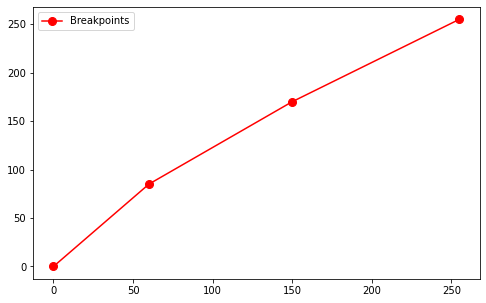

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


breakpoints = [0,60, 150, 255]
#slopes=[0.7,1.7,1]
#breakpoints = [0, 85, 130, 255]
slopes = [breakpoints[1]-breakpoints[0]/85,breakpoints[2]-breakpoints[1]/85,breakpoints[3]-breakpoints[2]/85 ]
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar los puntos de quiebre
ax.plot(breakpoints, np.linspace(0, 255, len(breakpoints)), 'ro-', markersize=8, label='Breakpoints')
ax.legend()

# Mostrar la gráfica
plt.show()

In [12]:
np.linspace(0, 255, len(breakpoints))

array([  0.,  85., 170., 255.])

In [13]:
import cv2
import numpy as np

def piecewise_linear(img, breakpoints, slopes):
    result_image = np.zeros_like(img, dtype=np.float64)

    for i in range(len(breakpoints) - 1):
        # Crear máscara booleana para el rango actual
        mask = (img >= breakpoints[i]) & (img < breakpoints[i + 1])

        # Aplicar la función lineal a pedazos solo en la región definida por la máscara
        result_image[mask] = slopes[i] * img[mask]

    # Normalizar antes de convertir a uint8
    result_image_normalized = (result_image - np.min(result_image)) / (np.max(result_image) - np.min(result_image)) * 255.0

    # Asegúrate de que el rango de intensidad sea [0, 255]
    result_image = np.clip(result_image_normalized, 0, 255).astype(np.uint8)
    return result_image

In [14]:
image = cv2.imread('flowers.jpeg', cv2.IMREAD_GRAYSCALE)

# Definir los puntos de quiebre y pendientes
breakpoints = [0, 85, 130, 255]
slopes = [breakpoints[1]-breakpoints[0]/85,breakpoints[2]-breakpoints[1]/85,breakpoints[3]-breakpoints[2]/85 ]

# Aplicar la función lineal a pedazos para mejorar la imagen
enhanced_image = piecewise_linear(image, breakpoints, slopes)

# Mostrar la imagen original y la imagen mejorada
cv2.imshow('Original Image', image)
cv2.imshow('Enhanced Image', enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

[1, 1, 1]